In [5]:
import os
print(os.listdir())

['.Rhistory', 'Lab1.Rmd', '.config', 'Music', '.condarc', 'Untitled1.ipynb', '.DS_Store', 'cleaned_health_outcome_data.csv', '.CFUserTextEncoding', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv', '.xonshrc', 'fd2dbace-3737-c713-a4b7-42dcddc25e7f.png', 'anaconda_projects', 'Untitled.ipynb', '.zshrc', '.local', 'Pictures', '.zprofile', 'Commit3.ipynb', 'Paper1.Rmd', '.zsh_history', '.ipython', 'Desktop', 'Library', '.matplotlib', 'Commit 2 Updated.ipynb', 'Public', '.idlerc', '.tcshrc', '.RData', '.anaconda', 'cleaned_food_access_data.csv', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', 'FoodAccessResearchAtlasData2019.csv', '.jupyter', 'Documents', 'cleaned_health_outcome_data1.csv', '.bash_profile', 'Downloads', '.python_history', '.continuum', 'cleaned_food_access_data1.csv', '.zsh_sessions', 'Assignment1.ipynb', '.conda']


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Research Question
# How does limited access to grocery stores in low-income communities, particularly communities of color,
# contribute to disparities in obesity rates in the United States?

In [12]:
# Load Datasets
food_access_data = pd.read_csv("FoodAccessResearchAtlasData2019.csv")
health_outcome_data = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv")

In [14]:
# Data Overview
print("Food Access Data:")
print(food_access_data.head())
print(food_access_data.info())

Food Access Data:
   CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1       

In [16]:
print("Health Outcome Data:")
print(health_outcome_data.head())
print(health_outcome_data.info())

Health Outcome Data:
   YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0       2011     2011           AK       Alaska      BRFSS   
1       2011     2011           AK       Alaska      BRFSS   
2       2011     2011           AK       Alaska      BRFSS   
3       2011     2011           AK       Alaska      BRFSS   
4       2011     2011           AK       Alaska      BRFSS   

                     Class                         Topic  \
0  Obesity / Weight Status       Obesity / Weight Status   
1  Obesity / Weight Status       Obesity / Weight Status   
2        Physical Activity  Physical Activity - Behavior   
3  Obesity / Weight Status       Obesity / Weight Status   
4  Obesity / Weight Status       Obesity / Weight Status   

                                            Question  Data_Value_Unit  \
0  Percent of adults aged 18 years and older who ...           2011.0   
1  Percent of adults aged 18 years and older who ...           2011.0   
2  Percent of adults who a

In [18]:
# Data Cleaning
# Checking for missing values
print("Missing values in Food Access Data:")
print(food_access_data.isnull().sum())
print("Missing values in Health Outcome Data:")
print(health_outcome_data.isnull().sum())

Missing values in Food Access Data:
CensusTract      0
State            0
County           0
Urban            0
Pop2010          0
                ..
TractAIAN        4
TractOMultir     4
TractHispanic    4
TractHUNV        4
TractSNAP        4
Length: 147, dtype: int64
Missing values in Health Outcome Data:
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                15400
Data_Value_Type                    0
Data_Value                     10767
Data_Value_Alt                 10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)              

In [20]:
# Drop unnecessary columns to reduce noise
food_access_data = food_access_data[['CensusTract', 'State', 'County', 'Pop2010', 'LILATracts_1And10', 'TractSNAP']]
health_outcome_data = health_outcome_data[['LocationID', 'LocationDesc', 'Data_Value', 'Stratification1', 'StratificationCategory1']]

In [22]:
# Merge the datasets on CensusTract and LocationID
merged_data = pd.merge(food_access_data, health_outcome_data, left_on='CensusTract', right_on='LocationID')

# Data Dictionary
# CensusTract: Unique identifier for a geographic area
# State: State name
# County: County name
# Pop2010: Population in 2010 Census
# LILATracts_1And10: Low Income and Low Access tract indicator
# TractSNAP: Households receiving SNAP benefits (proxy for low income)
# LocationID: Matching ID in health dataset
# LocationDesc: Location description
# Data_Value: Obesity prevalence rate (%)
# Stratification1: Demographic breakdown (e.g., Race/Ethnicity)
# StratificationCategory1: Demographic category (e.g., Race, Income)

In [28]:
# Exploratory Data Analysis (EDA) 
# Creating a new variable for Food Desert Severity
merged_data['FoodDesertSeverity'] = np.where(
    (merged_data['LILATracts_1And10'] == 1) & (merged_data['TractSNAP'] > 0), 'Severe', 'Moderate'
)

/var/folders/c4/mwls6lk56m99nbxsclf1gczc0000gp/T/ipykernel_12997/2284020302.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Food Desert Severity')


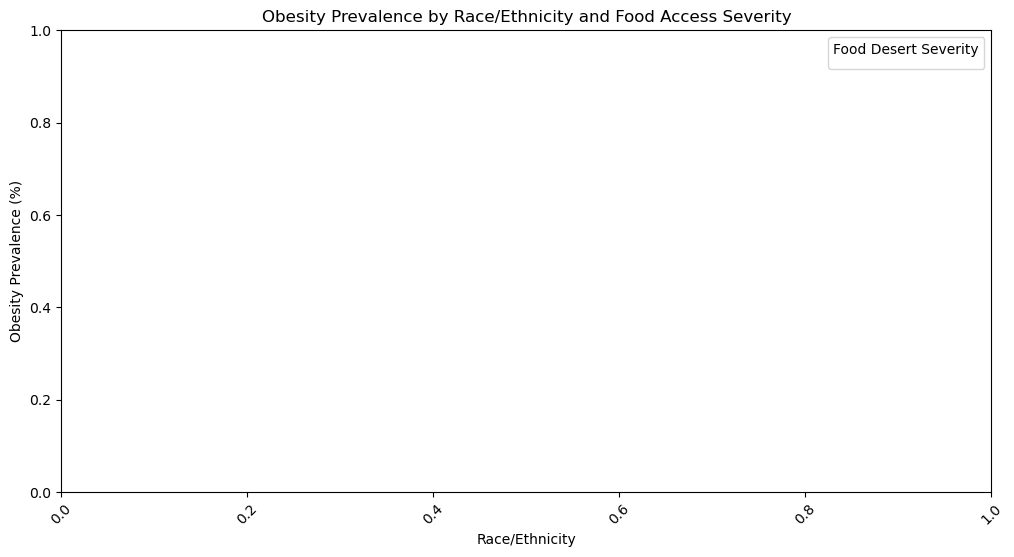

In [32]:
# Visualization: Obesity Rate by Race/Ethnicity and Food Access 
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Stratification1', y='Data_Value', hue='FoodDesertSeverity')
plt.title('Obesity Prevalence by Race/Ethnicity and Food Access Severity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Obesity Prevalence (%)')
plt.xticks(rotation=45)
plt.legend(title='Food Desert Severity')
plt.show()

# Insights & Recommendations
# 1. There is a correlation between food desert severity and higher obesity rates in communities of color.
# 2. Policy interventions should target increasing grocery store access in high-SNAP participation areas.
# 3. More granular analysis by age and gender could further refine the impact assessment.

# Next Steps
# - Conduct a regression analysis to quantify the impact of food deserts on obesity prevalence.
# - Incorporate additional socioeconomic variables to control for confounding factors.
# - Expand analysis to include time trends using multiple years of BRFSS data.

In [34]:
# Save the cleaned dataset for future use
merged_data.to_csv("cleaned_merged_data.csv", index=False)